<a href="https://colab.research.google.com/github/zd2011/foundML/blob/main/proj1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Numerical/scientific computing packages.
import numpy as np
import scipy
import pandas as pd

# Machine learning package.
from sklearn.linear_model import LinearRegression

# Useful for saving our models.
import pickle

# Plotting packages.
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

# importing data as nparray
data = np.genfromtxt('/content/gdrive/MyDrive/DS/ML/housingUnits.csv', delimiter=',')
print(data.shape)

#getting rid of nan headers
X, y = data[1:,:7], data[1:,7]

X_label = ['housing_median_age','total_rooms','total_bedrooms', 'population', 
           'households', 'median_income', 'ocean_proximity']
y_label = 'median_house_value'

Mounted at /content/gdrive
(20641, 8)


In [ ]:
#importing data as dataframe
df = pd.read_csv('/content/gdrive/MyDrive/DS/ML/housingUnits.csv')
df.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,41,880,223,322,126,208.1300,1,452600
1,21,7099,1338,2401,1138,207.5350,1,358500
2,52,1467,328,496,177,181.4350,1,352100
3,52,1274,293,558,219,141.0775,1,341300
4,52,1627,357,565,259,96.1550,1,342200


## 1. Why is it a good idea to standardize/normalize the predictor variables 2 and 3 and why are predictor variables 4 and 5 probably not very useful by themselves to predict *median* house values in a block?


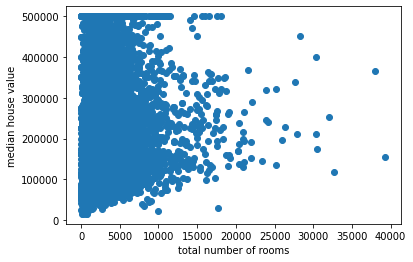

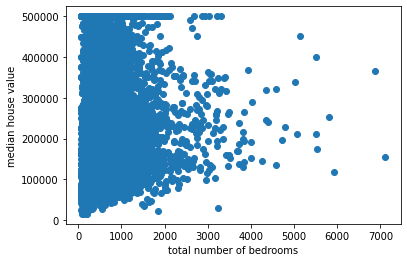

In [ ]:
total_rooms = X[:,1]
total_bedrooms = X[:,2]
population = X[:,3]
households = X[:,4]

#total rooms and med house value
plt.scatter(total_rooms, y)
plt.xlabel("total number of rooms")
plt.ylabel("median house value")
plt.show()

#total bedrooms and med house value
plt.scatter(total_bedrooms, y)
plt.xlabel("total number of bedrooms")
plt.ylabel("median house value")
plt.show()

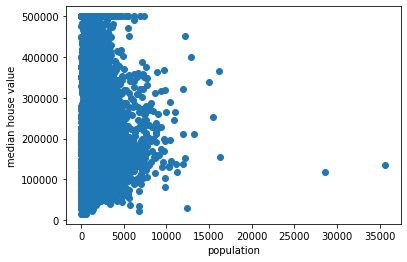

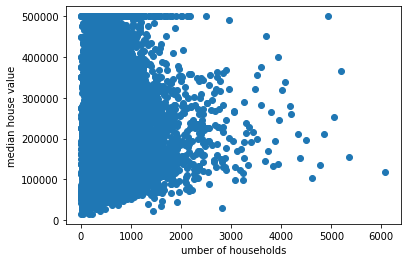

In [ ]:
#population and med house value
plt.scatter(population, y)
plt.xlabel("population")
plt.ylabel("median house value")
plt.show()

#num of households and med house value
plt.scatter(households, y)
plt.xlabel("umber of households")
plt.ylabel("median house value")
plt.show()

In [ ]:
#correlation matrix
df.corr()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
housing_median_age,1.000000,-0.361262,-0.361259,-0.296244,-0.302916,-0.119034,-0.295012,0.105623
total_rooms,-0.361262,1.000000,1.000000,0.857126,0.918484,0.198050,0.031586,0.134153
total_bedrooms,-0.361259,1.000000,1.000000,0.857118,0.918481,0.198046,0.031585,0.134154
population,-0.296244,0.857126,0.857118,1.000000,0.907222,0.004834,0.039415,-0.024650
households,-0.302916,0.918484,0.918481,0.907222,1.000000,0.013033,-0.012873,0.065843
median_income,-0.119034,0.198050,0.198046,0.004834,0.013033,1.000000,-0.163755,0.688075
ocean_proximity,-0.295012,0.031586,0.031585,0.039415,-0.012873,-0.163755,1.000000,-0.397251
median_house_value,0.105623,0.134153,0.134154,-0.024650,0.065843,0.688075,-0.397251,1.000000


**Answer:**


Variable 2 and 3 are total number of rooms and total number of bedrooms, respectively. Although we have the total number of rooms or bedrooms for a given block, we are unaware of how the blocks are designated. In other words, blocks themselves have different sizes, thus direct comparison of total number of rooms or bedrooms between blocks are meaningless. 

Plotting total number of rooms with respect to median house value and total number of bedrooms with respect to median house value using scatter plot, we see that the distribution of data are very similar. Examining the correlation matrix, the correlation between total number of rooms and total number of bedrooms is 1, which indicate a strong collinearity between these two features. Likewise, their correlations with population and number of houselds are also high: correlaiton between total_room/total_bedroom and population is 0.857, and correlaiton between total_room/total_bedroom and households is 0.918. On the contrary, correlaiton between total_room/total_bedroom and median house value is 0.134, which does not indicate a significant linear relationship.

As mentioned above, the strong collinearity among these features suggest the necessity for standardization. The purpose of standardization/normalization is to transform total number of rooms and bedrooms, according to their respective block size (indicated by the population or the number of households), to the same scale for comparison without changing the difference in range of values.



Logically, population and number of households in a block are not very useful by themselves to predict median house value in a block. As mentioned before, block size in large part determines the population and the number of households of a block. Utilizing scatter plot of population and households with respect to median house value, respectively, we do not see a clear prediction pattern. The correlation matrix also indicate that these two variables have almost no correlation with median house value, with correlaiton between population and median house value being -0.025 and correlaiton between population and median house value being 0.066.


Intuitively, the median house value is not dependent on how big the block is, and thus population or number of households in a block is not very useful by themselves to predict median house value; other features, such asshould also be included to focus onto aspects of average houses.

## 2. To meaningfully use predictor variables 2 (number of rooms) and 3 (number of bedrooms), you will need to standardize/normalize them. Using the data, is it better to normalize them by population (4) or number of households (5)?

In [ ]:
#normalizing by population and household
roompp = total_rooms/population
roomph = total_rooms/households
brpp = total_bedrooms/population
brph = total_bedrooms/households

In [ ]:
#accessing efficacy
print('total_room standardized by population:')
print('correlation between room and bedroom: ', np.corrcoef(roompp,brpp)[0,1])
print('correlation between room and median house value: ', np.corrcoef(roompp,y)[0,1])
print('correlation between bedroom and median house value: ', np.corrcoef(brpp,y)[0,1])

total_room standardized by population:
correlation between room and bedroom:  0.6414637002481957
correlation between room and median house value:  0.20948196900668958
correlation between bedroom and median house value:  0.11309509846221795


In [ ]:
print('total_room standardized by households:')
print('correlation between room and bedroom: ', np.corrcoef(roomph,brph)[0,1])
print('correlation between room and median house value: ', np.corrcoef(roomph,y)[0,1])
print('correlation between bedroom and median house value: ', np.corrcoef(brph,y)[0,1])

total_room standardized by households:
correlation between room and bedroom:  0.5187238864208912
correlation between room and median house value:  0.15194828974145783
correlation between bedroom and median house value:  0.05826043391267523


**Answer:**

As we analyzed in the previous question, both population and households are valid features by which total_rooms and total_bedrooms could be normalized upon. To decide which variable is more appropriate, we conduct both normalizations and examine the effect of both normalizations. 

If we normalize by population, the correlation between rooms per person and bedrooms per person decreases to 0.641, and correlation between rooms per person and median house value is 0.209, and correlation between bedrooms per person and median house value is 0.113. If we normalize by households, the correlation between rooms per household and bedrooms per household decreases to 0.519, and correlation between rooms per household and median house value is 0.152, and correlation between bedrooms per household and median house value is 0.058.

Therefore, we have a trade-off between two normalizations: normalizing by population results in higher correlation between rooms/bedrooms per person and median house value, while normalizing by households reduces collinearity between rooms per household and bedroom per household. In this case, our main focus is reducing collinearity rather than increasing correlations of predictor variables, otherwise our trained model later would still suffer the issue of collinearity and allocate beta in an unpredictive way.


Looking at the structure of data and our goal of predicting median house value, it would be more reasonable to normalize by households as we want to infer our target variable from the aspects of an average house of a block (for instance, how big an average house is, and the layout of an average house). An average person's possession of a house (normalizing by population) would not make sense here.

In conclusion, we would normalize by household not only because it reduces collinearity but also corresponds with more ideal condition of data.



## 3. Which of the seven variables is most *and* least predictive of housing value, from a simple linear regression perspective? 

In [ ]:
#replacing original variable 2,3 with normalized ones
df_norm = df.assign(total_rooms = roomph)
df_norm = df_norm.assign(total_bedrooms = brph)
df_norm.rename(columns={'total_rooms': 'roomph', 'total_bedrooms': 'brph'}, inplace=True)
df_norm.head()

,housing_median_age,roomph,brph,population,households,median_income,ocean_proximity,median_house_value
0,41,6.984127,1.769841,322,126,208.1300,1,452600
1,21,6.238137,1.175747,2401,1138,207.5350,1,358500
2,52,8.288136,1.853107,496,177,181.4350,1,352100
3,52,5.817352,1.337900,558,219,141.0775,1,341300
4,52,6.281853,1.378378,565,259,96.1550,1,342200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5bdb1957f0>,
      dtype=object)

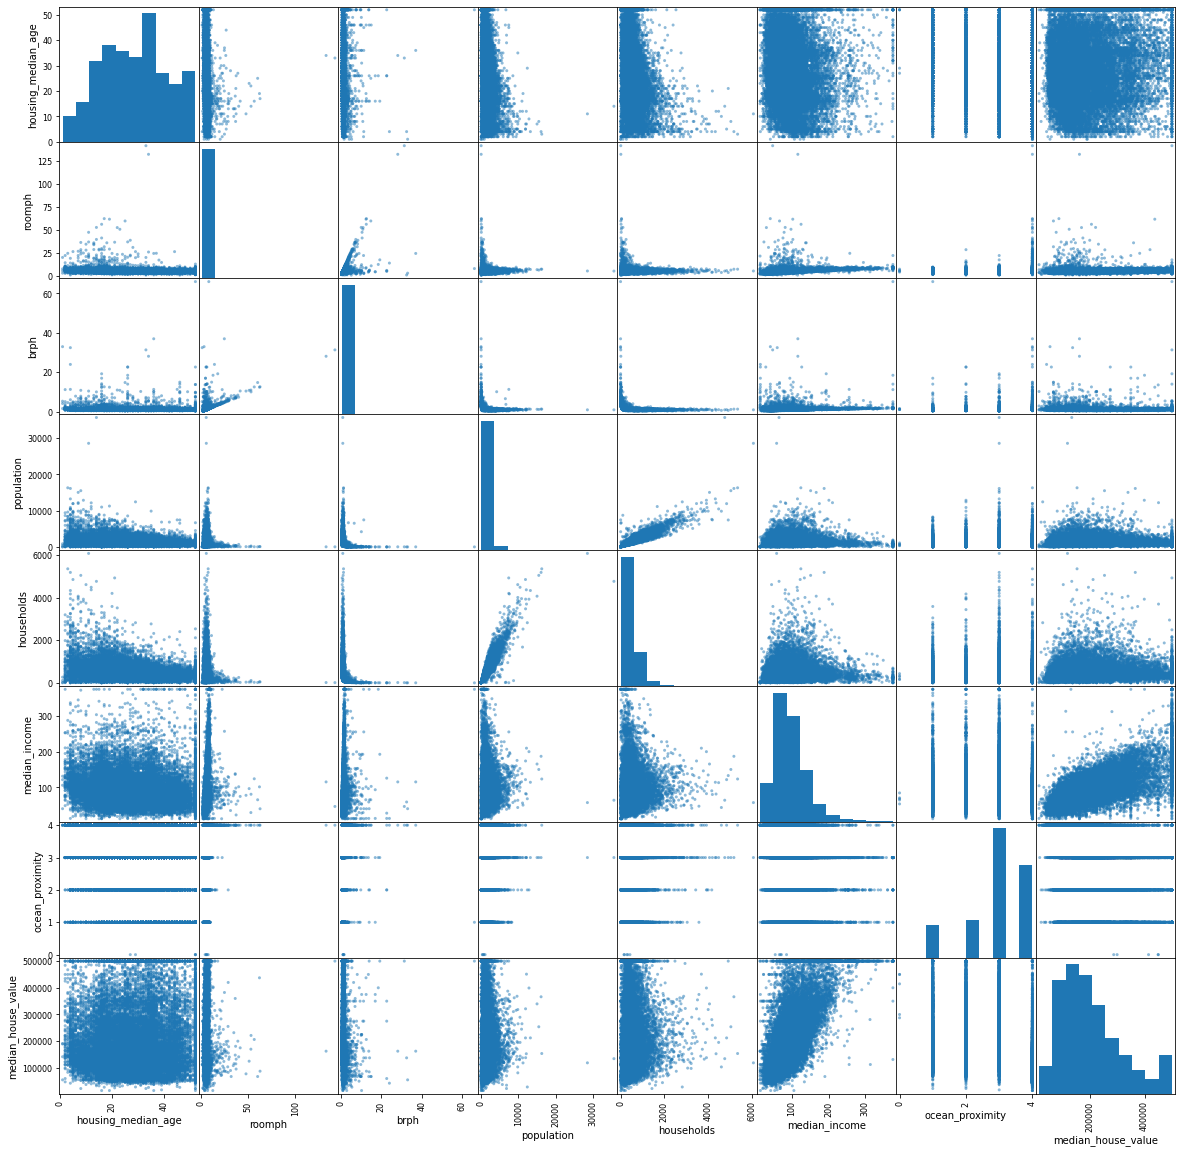

In [ ]:
#checking scatter plot & distributions
pd.plotting.scatter_matrix(df_norm,figsize  = [20, 20])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


X_norm_label = ['housing_median_age','roomph','brph', 'population', 
           'households', 'median_income', 'ocean_proximity']
X_norm = df_norm[X_norm_label].to_numpy()

#test train split
xTrain, xTest, yTrain, yTest = train_test_split(X_norm, y.reshape(-1,1), test_size=0.8, random_state=0)

#training model and getting result
for i in range(0,7):
  model = LinearRegression().fit(xTrain[:,i].reshape(-1, 1),yTrain.reshape(-1, 1))
  rSqr = model.score(xTrain[:,i].reshape(-1, 1),yTrain.reshape(-1, 1))
  print('Prediction of {} for median house value have R^2 = {:.3f}'.format(X_norm_label[i],rSqr))

  y_pred = model.predict(xTest[:,i].reshape(-1, 1))
  rmse = mean_squared_error(yTest.reshape(-1, 1), y_pred, squared=False)
  print('RMSE is {:.3f} for predicted values\n'.format(rmse))


Prediction of housing_median_age for median house value have R^2 = 0.010
RMSE is 115089.909 for predicted values

Prediction of roomph for median house value have R^2 = 0.057
RMSE is 117145.244 for predicted values

Prediction of brph for median house value have R^2 = 0.011
RMSE is 116651.575 for predicted values

Prediction of population for median house value have R^2 = 0.000
RMSE is 115718.804 for predicted values

Prediction of households for median house value have R^2 = 0.005
RMSE is 115502.347 for predicted values

Prediction of median_income for median house value have R^2 = 0.487
RMSE is 84287.279 for predicted values

Prediction of ocean_proximity for median house value have R^2 = 0.153
RMSE is 106176.811 for predicted values



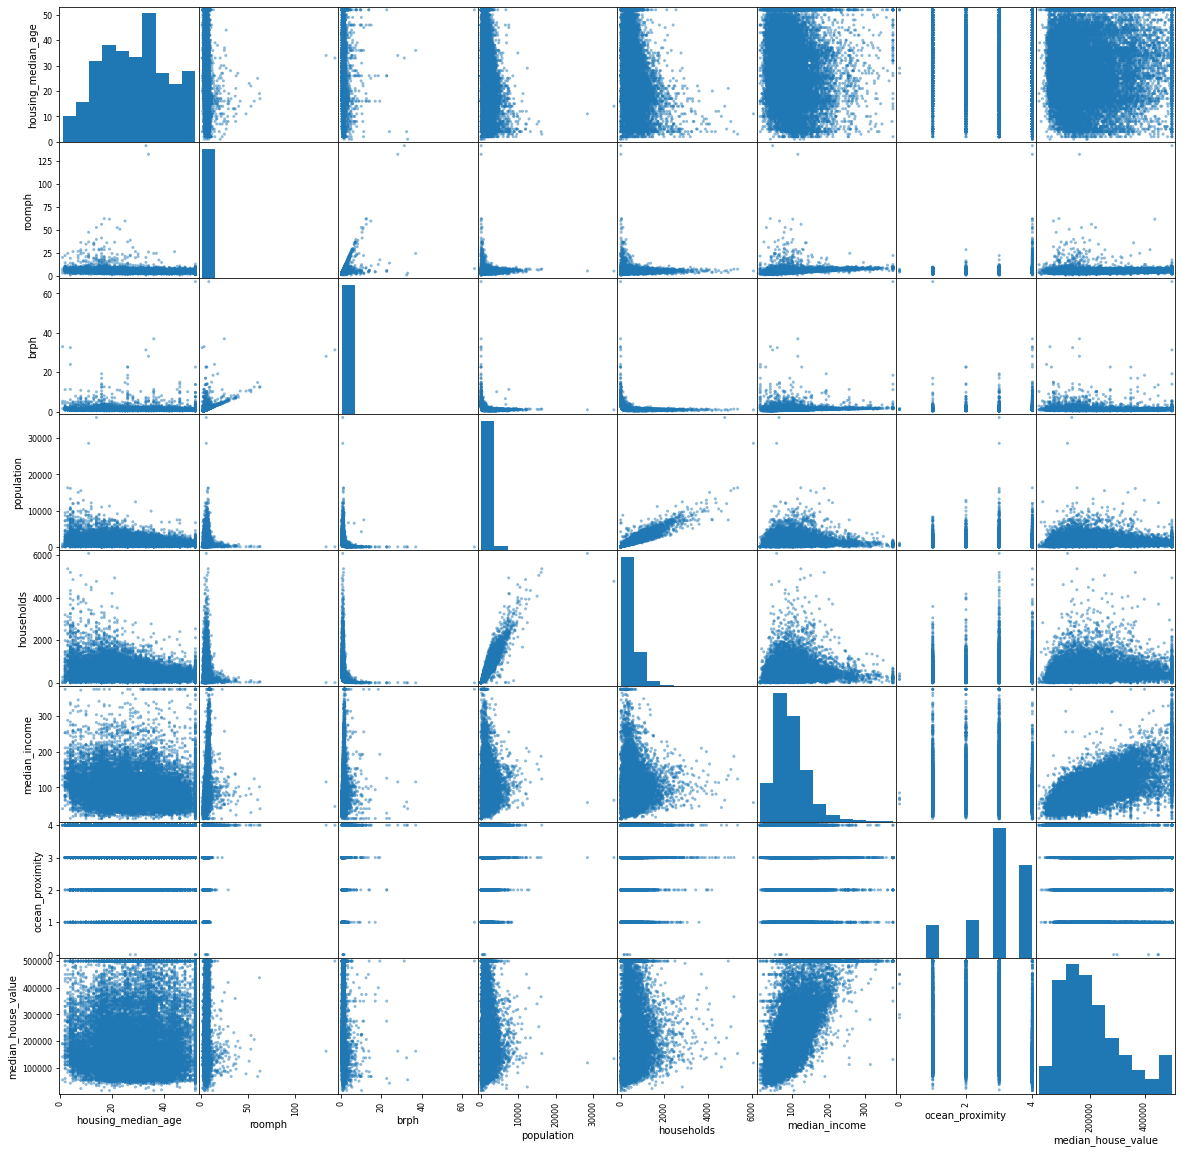

**Answer:**

Using the normalized feature rooms per household and bedrooms per household, we first conduct a test-train split with 60% of data in the test set. Then for each predictive features, we conduct an OLS regression and calculate the R^2 value (meaning how much variance in the outcomes is accounted for by the model) of the linear regression model. Then using the model for each predictive feature, we obtain the predicted median house value and calculate the root mean squared error of our prediciton. Using R^2 value, we see that median income is the most predictive and population is the least predictive. The RMSE result also corroborates with this outcome. 

Looking at the distribution of features and scatter plots of predictive features, however, we see that there is indeed limitation on the data. The histogram shows that rooms per households, bedrooms per households, population, households,median income are right skewed. In response, we see that median house value is also right skewed with a another peak on the right. Ocean proximity, on the other hand, have a left skewed (intuitively people live nearer to water). As a result, we see that rooms per household, bedroom per household, and population have relatively small values across all median house values. Inspecting scatter plot of our most predictive feature, median income, and median house value, we see that with the greatest value of median house value, the median income are distributed across the entire range, suggesting not simply a linear relationship.

Therefore, we indeed have limitations with features based on our collected data: features such as rooms per household, bedrooms per household, population can me more predictive. With our current dataset, the most predictive feature is median income and the least predictive feature is population.

## 4. Putting all predictors together in a multiple regression model – how well do these predictors taken together predict housing value? How does this full model compare to the model that just has the single best predictor from 3?

In [ ]:
#model for multiple regression
model = LinearRegression().fit(xTrain,yTrain.reshape(-1, 1))
rSqr = model.score(xTrain,yTrain.reshape(-1, 1))
print('R^2 for multiple regression model is {:.3f}'.format(rSqr))

#fitting to test data
y_pred = model.predict(xTest)
rmse = mean_squared_error(yTest.reshape(-1, 1), y_pred, squared=False)
print('RMSE for multiple regression model is {:.3f}'.format(rmse))

R^2 for multiple regression model is 0.602
RMSE for multiple regression model is 73925.035


**Answer:**

Putting predictors together in a multiple regression model and conducting prediction, we see that our multiple linear regression model has R^2 value of 0.602, meaning 60.2% of variance in the outcomes is accounted for by the model. The RMSE is 73925.035. Compared to the model using median income as predictor, the multiple regression model is better both in terms of R^2 and RMSE.

## 5. Considering the relationship between the (standardized) variables 2 and 3, is there potentially a concern regarding collinearity? Is there a similar concern regarding variables 4 and 5, if you were to include them in the model?

In [ ]:
#correlation matrix with normalized variable 2,3
df_norm.corr()

,housing_median_age,roomph,brph,population,households,median_income,ocean_proximity,median_house_value
housing_median_age,1.000000,-0.153277,-0.036226,-0.296244,-0.302916,-0.119034,-0.295012,0.105623
roomph,-0.153277,1.000000,0.518724,-0.072213,-0.080598,0.326895,0.106435,0.151948
brph,-0.036226,0.518724,1.000000,-0.175877,-0.197504,0.156464,0.063338,0.058260
population,-0.296244,-0.072213,-0.175877,1.000000,0.907222,0.004834,0.039415,-0.024650
households,-0.302916,-0.080598,-0.197504,0.907222,1.000000,0.013033,-0.012873,0.065843
median_income,-0.119034,0.326895,0.156464,0.004834,0.013033,1.000000,-0.163755,0.688075
ocean_proximity,-0.295012,0.106435,0.063338,0.039415,-0.012873,-0.163755,1.000000,-0.397251
median_house_value,0.105623,0.151948,0.058260,-0.024650,0.065843,0.688075,-0.397251,1.000000


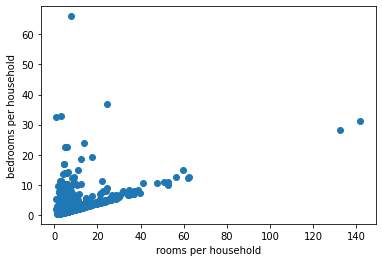

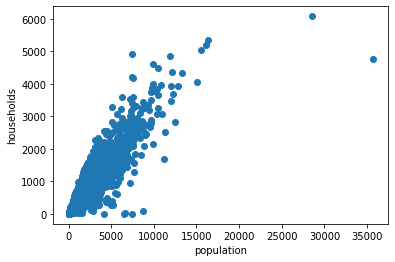

In [ ]:
#roomph and brph
plt.scatter(roomph, brph)
plt.xlabel('rooms per household')
plt.ylabel("bedrooms per household")
plt.show()

#population and household
plt.scatter(population, households)
plt.xlabel('population')
plt.ylabel("households")
plt.show()

**Answer:**

Looking at the correlation matrix, we see that the correlation between rooms per household and bedrooms per household is 0.519, and the correlation between population and households is 0.907. Rooms per household and bedrooms per household have a relatively strong correlation, and there is indeed collinearity concerns. Moreover, population and households have a very strong positive correlation, which would make the column space of population, households becomes a line. Our linear regression model would thus allocate the beta between rooms per household and bedrooms per household (also population and households) in an unpredictive way.

## Extra credit: 

### a. Does any of the variables (predictor or outcome) follow a distribution that can reasonably be described as a normal distribution?

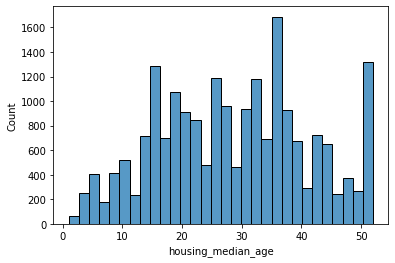

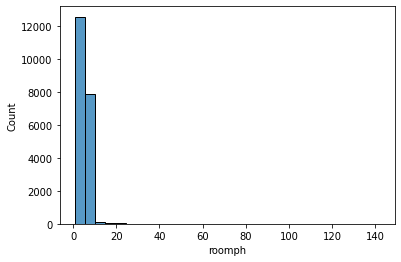

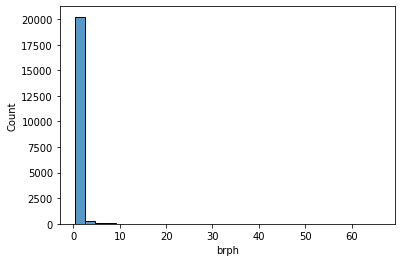

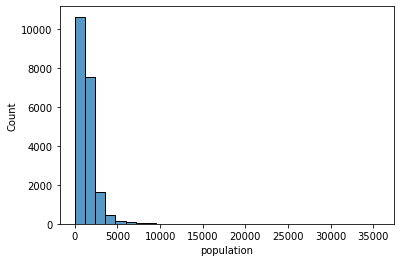

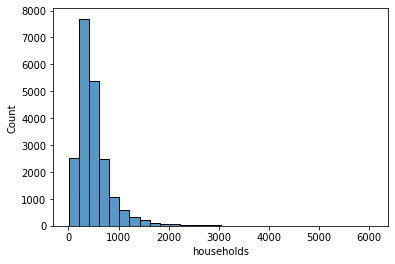

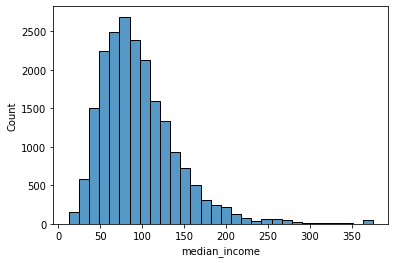

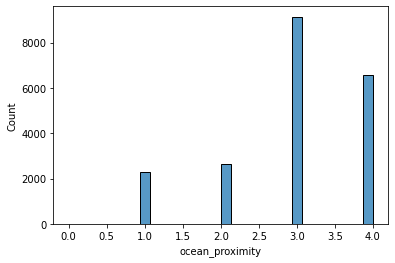

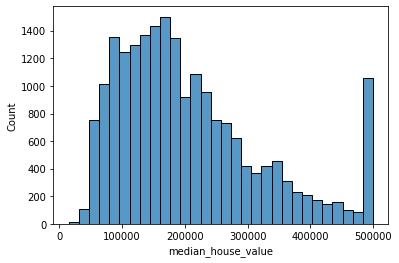

In [ ]:
import seaborn as sns

#plotting distributions for each variable
for i in df_norm.columns:
  sns.histplot(df_norm[i], bins = 30)
  plt.show()

**Answer:**

Looking at the distribution of predictive variables, we see that rooms per household, bedrooms per household, population, household, and median income follows a left skewed distribution. Although one can argue that the distribution of median income is visually normal, the outliers on the far right should not be ignored. 

Ocean Proximity, on the contrary, follows a right skewed distribution, with most data having ocean proximity of 3 or 4. 

Housing median age follows somewhat of a normal distribution, but in fact we see a peak at greatest median housing ages (>50). Thus median housing age  also does not follow a normal distribution. Likewise, median house value is also right skewed, but with a peak at biggest median house value (around 500000)


Therefore, there is no variable that can be reasonably described as having normal distribution.

### b. Examine the distribution of the outcome variable. Are there any characteristics of this distribution that might limit the validity of the conclusions when answering the questions above? If so, please comment on this characteristic.

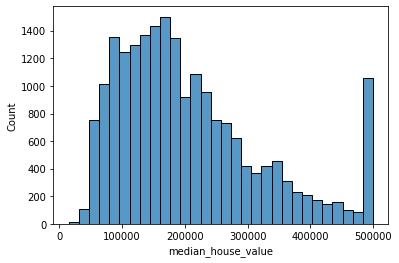

In [ ]:
sns.histplot(df_norm.median_house_value, bins = 30)

**Answer:**

As mentioned above, we see that the distribution of median house value is left skewed with a peak at greatest of median house values (around 500000). Such bimodal distribution enables us to view the distribution in two parts given a certain threshold: for price lower than 500000, there is less case as median house value increases, and there is a cluster of houseswith price aorund 500000. 

Examining predictive variables with respect to outcome variable (using scatter matrix from problem 3), we see that there is no clear indication of predictive variable in response to high median house value. For instance, the median income have a wide range conditioned on median housing value aorund 500000. The bimodal distribution of outcome variable would certainly pose an issue for our linear regression and it is rather reasonable to consider the clusters of high meidan house values 